# Import Librairies

In [622]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load Labels and Images

In [623]:
def load_labels():
    txt_file_path = "./data/labels.txt"
    labels = []
    with open(txt_file_path, 'r') as f:
        for line in f:
            labels.append(line.strip())
    return labels

In [624]:
game_states = load_labels()
game_states = sorted(game_states)
game_states

['000000001111',
 '000000011110',
 '000000101101',
 '000000111100',
 '000001001011',
 '000001011010',
 '000001101001',
 '000001111000',
 '000010000111',
 '000010010110',
 '000010100101',
 '000010110100',
 '000011000011',
 '000011010010',
 '000011100001',
 '000011110000',
 '000100001110',
 '000100101100',
 '000101001010',
 '000101101000',
 '000110000110',
 '000110100100',
 '000111000100',
 '000111100000',
 '001000001101',
 '001000011100',
 '001001001001',
 '001001011000',
 '001010000101',
 '001010010100',
 '001011000001',
 '001011010000',
 '001100001100',
 '001101001000',
 '001110000100',
 '001111000000',
 '010000001011',
 '010000011010',
 '010000101001',
 '010000111000',
 '010010000011',
 '010010010010',
 '010010100001',
 '010010110000',
 '010100001010',
 '010100101000',
 '010110000010',
 '010110100000',
 '011000001001',
 '011000011000',
 '011010000001',
 '011010010000',
 '011100001000',
 '011110000000',
 '100000000111',
 '100000010110',
 '100000100101',
 '100000110100',
 '100001000011

In [625]:
image_height = 128
image_width = 128
batch_size = 81

def load_data():
    # Load Train Data
    train_images = tf.keras.utils.image_dataset_from_directory("./data/BBTrD/", batch_size=batch_size, image_size=(image_height, image_width), shuffle=False)

    # Load Test Data
    test_images =tf.keras.utils.image_dataset_from_directory("./data/BBTeD/", batch_size=batch_size, image_size=(image_height, image_width), shuffle=False)
    return train_images, test_images

In [626]:
train_images, test_images = load_data()

Found 81 files belonging to 81 classes.
Found 34 files belonging to 34 classes.


# View Class Names of loaded data 

In [627]:
class_names = train_images.class_names
class_names

['000000001111',
 '000000011110',
 '000000101101',
 '000000111100',
 '000001001011',
 '000001011010',
 '000001101001',
 '000001111000',
 '000010000111',
 '000010010110',
 '000010100101',
 '000010110100',
 '000011000011',
 '000011010010',
 '000011100001',
 '000011110000',
 '000100001110',
 '000100101100',
 '000101001010',
 '000101101000',
 '000110000110',
 '000110100100',
 '000111000100',
 '000111100000',
 '001000001101',
 '001000011100',
 '001001001001',
 '001001011000',
 '001010000101',
 '001010010100',
 '001011000001',
 '001011010000',
 '001100001100',
 '001101001000',
 '001110000100',
 '001111000000',
 '010000001011',
 '010000011010',
 '010000101001',
 '010000111000',
 '010010000011',
 '010010010010',
 '010010100001',
 '010010110000',
 '010100001010',
 '010100101000',
 '010110000010',
 '010110100000',
 '011000001001',
 '011000011000',
 '011010000001',
 '011010010000',
 '011100001000',
 '011110000000',
 '100000000111',
 '100000010110',
 '100000100101',
 '100000110100',
 '100001000011

# Visualize the Loaded Data

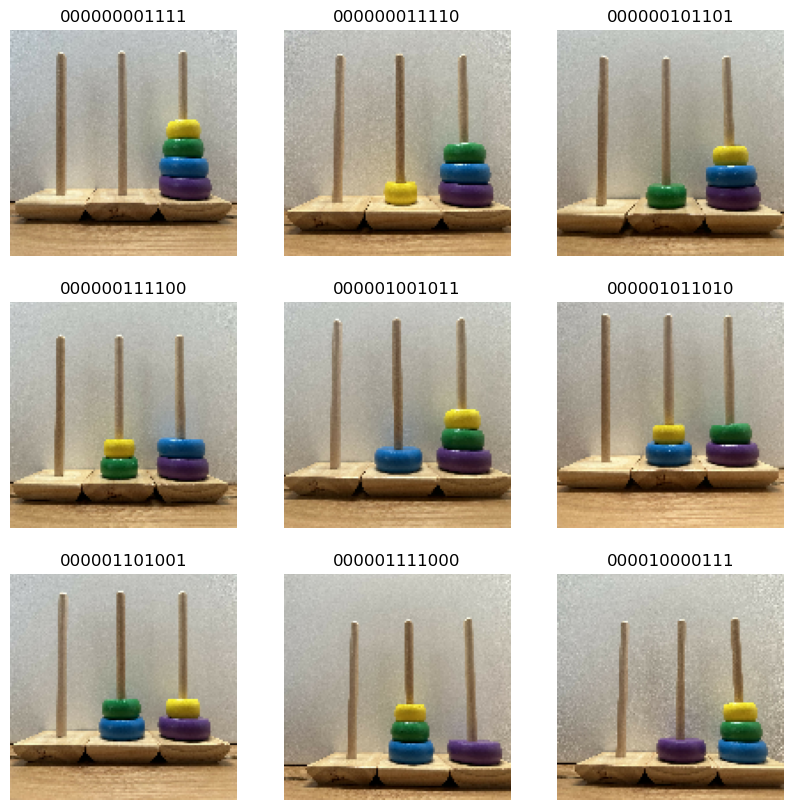

In [628]:
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(game_states[labels[i]])
        plt.axis("off")

# Data Processing

## Resize & Rescale Images

In [629]:
resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(1./255)
])

train_images = train_images.map(lambda x, y: (resize_and_rescale(x), y))
test_images = train_images.map(lambda x, y: (resize_and_rescale(x), y))

## Data Augmentation

In [630]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomBrightness(0.2)
])
augmented_data = train_images.map(lambda x, y: (data_augmentation(x), y))
train_images = train_images.concatenate(augmented_data)
train_images = train_images.map(lambda x, y: (resize_and_rescale(x), y))

# Define CNN-Model

In [631]:
num_classes = 81

cnn_model = tf.keras.Sequential([
    # First Convulation Layer
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    # Second Convulation Layer
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    # Thrid Convulation Layer
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(num_classes, activation='softmax')
  
])

# Add an Optimizer to CNN model

In [632]:
cnn_model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Train Model

In [633]:
epochNb = 10
cnn_model.fit(train_images,epochs=epochNb)

Epoch 1/10


/Users/cyrilkhoneisser/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 9s 3s/step - loss: 4.3946 - accuracy: 0.0123
Epoch 2/10
2/2 [==============================] - 7s 2s/step - loss: 4.3939 - accuracy: 0.0185
Epoch 3/10
2/2 [==============================] - 7s 3s/step - loss: 4.4083 - accuracy: 0.0123
Epoch 4/10
2/2 [==============================] - 8s 3s/step - loss: 4.4002 - accuracy: 0.0185
Epoch 5/10
2/2 [==============================] - 7s 3s/step - loss: 4.3949 - accuracy: 0.0062
Epoch 6/10
2/2 [==============================] - 7s 3s/step - loss: 4.3946 - accuracy: 0.0123
Epoch 7/10
2/2 [==============================] - 7s 3s/step - loss: 4.3962 - accuracy: 0.0062
Epoch 8/10
2/2 [==============================] - 8s 3s/step - loss: 4.3950 - accuracy: 0.0123
Epoch 9/10
2/2 [==============================] - 7s 3s/step - loss: 4.3935 - accuracy: 0.0062
Epoch 10/10
2/2 [==============================] - 7s 2s/step - loss: 4.3928 - accuracy: 0.0123


# Evaluate CNN Model

In [634]:
cnn_model.evaluate(test_images)

1/1 [==============================] - 2s 2s/step - loss: 4.3946 - accuracy: 0.0123


[4.394585132598877, 0.012345679104328156]

# Predict State

In [635]:
prediction = cnn_model.predict(test_images)

1/1 [==============================] - 2s 2s/step
